In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [3]:
triplets_file = '/content/drive/MyDrive/transactions.txt'
card_df = pd.read_table(triplets_file,header=None)

In [4]:
import json

with open('/content/drive/MyDrive/transactions.txt', 'r') as file:
    data = file.readlines()

data = [json.loads(d) for d in data]
df = pd.DataFrame(data)

In [5]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

### Null values

In [7]:
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64


### A peek at data

In [8]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [9]:
df.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [10]:
pd.set_option('precision', 3)
df.loc[:, ['transactionAmount']].describe()

,transactionAmount
count,786363.000
mean,136.986
std,147.726
min,0.000
25%,33.650
50%,87.900
75%,191.480
max,2011.540


### Visualization of transaction amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


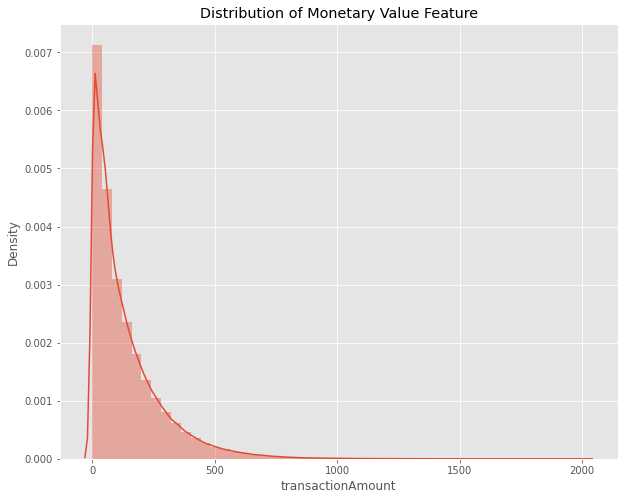

In [11]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.transactionAmount)

# Fraud vs. Normal Transactions 

In [12]:
counts = df.currentBalance.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 33678 non-fraudulent transactions (99.994%) and 2 fraudulent transactions (0.006%).


In [13]:
corr = df.corr()
corr

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
creditLimit,1.000,0.835,0.006,0.654,-0.004,2.391e-03,3.108e-03
availableMoney,0.835,1.000,-0.010,0.129,0.003,4.067e-03,-1.538e-03
transactionAmount,0.006,-0.010,1.000,0.024,0.037,1.751e-03,7.565e-02
currentBalance,0.654,0.129,0.024,1.000,-0.011,-1.285e-03,7.715e-03
cardPresent,-0.004,0.003,0.037,-0.011,1.000,4.039e-02,-4.342e-02
expirationDateKeyInMatch,0.002,0.004,0.002,-0.001,0.040,1.000e+00,-9.724e-04
isFraud,0.003,-0.002,0.076,0.008,-0.043,-9.724e-04,1.000e+00


### Heatmap

Text(0.5, 1.0, 'Heatmap of Correlation')

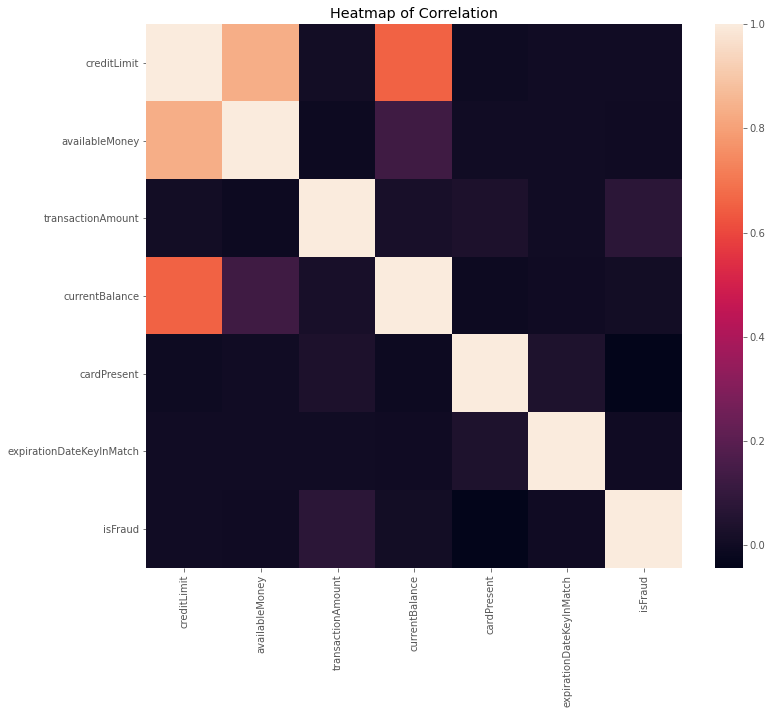

In [14]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

### Skewness

In [15]:
skew_ = df.skew()
skew_

accountNumber                0.112
customerId                   0.112
creditLimit                  2.280
availableMoney               2.999
transactionAmount            2.092
cardCVV                      0.046
enteredCVV                   0.046
cardLast4Digits              0.079
currentBalance               3.362
cardPresent                  0.206
expirationDateKeyInMatch    27.403
isFraud                      7.768
dtype: float64

### Scaling Transaction Amount

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

scaled_amount = scaler2.fit_transform(df[['transactionAmount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

### Concatenating newly created columns with original df

In [17]:
df = pd.concat([df, scaled_amount.rename('scaled_amount')], axis=1)
df.sample(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,scaled_amount
677028,871734327,871734327,7500.0,3529.84,2016-07-23T16:29:33,2.99,ebay.com,US,US,05,08,online_retail,05/2021,2011-11-11,2016-03-13,293,293,2207,REVERSAL,,3970.16,,,,False,,,False,False,-0.907
731011,839863227,839863227,5000.0,1252.57,2016-05-10T23:02:21,955.42,Best Pub,US,US,09,01,food,04/2021,2008-08-16,2008-08-16,323,323,1494,PURCHASE,,3747.43,,,,True,,,False,False,5.540
498292,171684236,171684236,5000.0,986.91,2016-12-04T18:01:40,161.91,Rodeway Inn #874370,US,US,09,01,hotels,10/2026,2014-12-07,2016-11-15,723,723,1579,PURCHASE,,4013.09,,,,True,,,False,False,0.169
708233,699894252,699894252,2500.0,228.63,2016-04-23T14:25:53,7.68,apple.com,US,US,05,01,online_retail,02/2031,2014-11-27,2016-02-10,933,933,5758,PURCHASE,,2271.37,,,,False,,,False,False,-0.875
488085,441721980,441721980,500.0,500.00,2016-12-21T13:53:18,307.70,discount.com,US,US,05,01,online_retail,07/2025,2012-10-17,2016-03-21,654,654,8354,PURCHASE,,0.00,,,,False,,,False,False,1.156
524227,967690618,967690618,10000.0,9403.82,2016-03-14T18:59:17,63.97,Mobil Gas #851671,US,US,05,01,fuel,04/2023,2014-05-25,2014-05-25,697,697,7978,PURCHASE,,596.18,,,,True,,,False,False,-0.494
382530,828981768,828981768,2500.0,506.76,2016-08-12T06:26:56,78.87,Dinosaur Drive in,US,US,05,01,food,06/2021,2014-01-31,2016-07-29,261,261,5804,PURCHASE,,1993.24,,,,True,,,False,False,-0.393
534579,208319653,208319653,15000.0,4865.02,2016-04-02T02:49:36,253.57,Shell Tire,US,US,02,08,auto,09/2030,2015-03-17,2016-03-01,548,548,7629,PURCHASE,,10134.98,,,,False,,,False,False,0.789
710897,864716575,864716575,2500.0,356.31,2016-01-28T17:52:27,36.93,AMC #606218,US,US,05,01,entertainment,03/2029,2014-12-27,2014-12-27,891,891,5742,PURCHASE,,2143.69,,,,False,,,False,False,-0.677
781723,357985585,357985585,250.0,63.81,2016-03-14T13:10:54,140.42,Virgin Airlines,US,US,02,08,airline,08/2027,2015-06-28,2016-03-05,250,250,6441,PURCHASE,,186.19,,,,False,,,False,False,0.023


### Dropping old amount and time columns

In [18]:
df.drop(['transactionAmount','transactionDateTime'], axis=1, inplace=True)

# Splitting of the dataset

In [19]:
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (708032, 28)
Test Shape: (78331, 28)


In [20]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### Subsample data set with balanced class distributions

In [21]:
no_of_frauds = train.currentBalance.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 2 fraudulent transactions in the train data.


In [22]:
non_fraud = train[train['currentBalance'] == 0]
fraud = train[train['currentBalance'] == 1]

In [23]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,accountNumber,customerId,creditLimit,availableMoney,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,scaled_amount
130594,759046253,759046253,250.0,250.0,Play Store,US,US,05,01,mobileapps,12/2020,2013-05-13,2013-05-13,939,939,9892,PURCHASE,,0.0,,,,False,,,False,False,-0.899
14712,897492259,897492259,15000.0,15000.0,Universe Massage #178284,US,US,02,08,personal care,12/2026,2014-01-23,2014-01-23,953,953,2098,PURCHASE,,0.0,,,,True,,,False,False,-0.647


### Concatenating both into a subsample data set with equal class distribution

In [24]:
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
subsample = pd.concat([selected, fraud])
len(subsample)

4

In [25]:
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(5)

,accountNumber,customerId,creditLimit,availableMoney,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,scaled_amount
0,759046253,759046253,250.0,250.0,Play Store,US,US,05,01,mobileapps,12/2020,2013-05-13,2013-05-13,939,939,9892,PURCHASE,,0.0,,,,False,,,False,False,-0.899
1,330933081,330933081,250.0,249.0,amazon.com,US,US,09,01,online_retail,03/2021,2014-10-26,2016-07-27,246,246,1120,PURCHASE,,1.0,,,,False,,,False,False,-0.300
2,897492259,897492259,15000.0,15000.0,Universe Massage #178284,US,US,02,08,personal care,12/2026,2014-01-23,2014-01-23,953,953,2098,PURCHASE,,0.0,,,,True,,,False,False,-0.647
3,620483081,620483081,5000.0,4999.0,oldnavy.com,US,US,09,01,online_retail,10/2032,2012-02-17,2016-09-12,694,694,6226,PURCHASE,,1.0,,,,False,,,False,False,-0.415


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

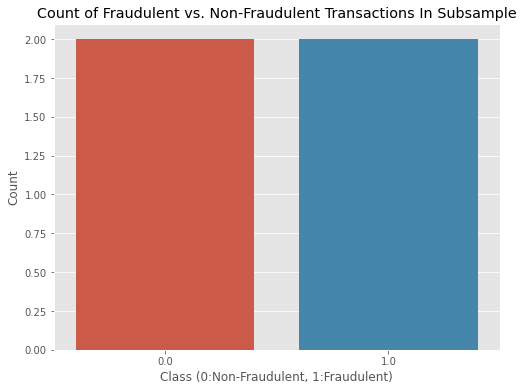

In [26]:
new_counts = subsample.currentBalance.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [27]:
corr = subsample.corr()
corr = corr[['currentBalance']]
corr

,currentBalance
creditLimit,-0.415
availableMoney,-0.415
currentBalance,1.000
cardPresent,-0.577
expirationDateKeyInMatch,NaN
isFraud,NaN
scaled_amount,0.905


### Negative correlations smaller than -0.5

In [28]:
corr[corr.currentBalance < -0.5]

,currentBalance
creditLimit,-0.707
availableMoney,-0.707
cardPresent,-1.000
scaled_amount,-0.844


### Positive correlations greater than 0.5

In [28]:
corr[corr.currentBalance > 0.5]

,currentBalance
currentBalance,1.000
scaled_amount,0.905


### Visualizing features with high negative correlation

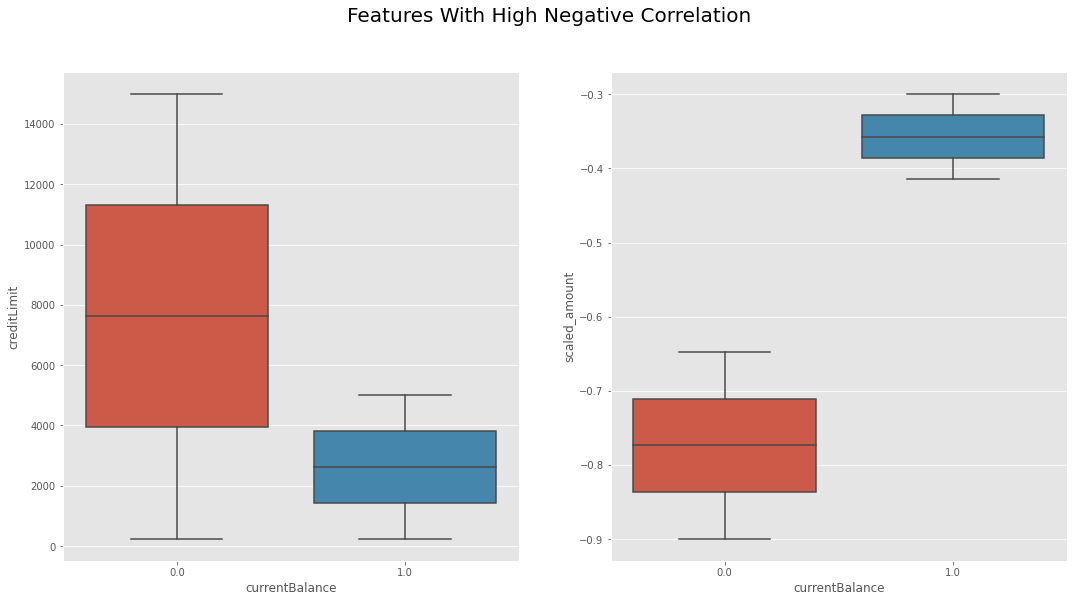

In [29]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Negative Correlation', size=20)
sns.boxplot(x="currentBalance", y="creditLimit", data=subsample, ax=axes[0])
sns.boxplot(x="currentBalance", y="scaled_amount", data=subsample, ax=axes[1])


### Removing extreme outliers

In [30]:
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 4 transactions by 1 transactions to 3 transactions.


In [32]:
from sklearn.manifold import TSNE

X = df2.drop('currentBalance', axis=1)
y = df2['currentBalance']

In [33]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [34]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [36]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (2, 27) (1, 27) 

Y_shapes:
 Y_train: Y_validation:
 (2,) (1,)


In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

In [49]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=2, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: nan (nan)
LDA: nan (nan)
KNN: nan (nan)
CART: nan (nan)
SVM: nan (nan)
XGB: nan (nan)
RF: nan (nan)
